In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from alibi.explainers import IntegratedGradients
import matplotlib.pyplot as plt

2025-05-12 04:23:01.743012: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-12 04:23:01.745797: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-12 04:23:01.787238: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-12 04:23:01.787288: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-12 04:23:01.787340: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
# 1. Crear un modelo LSTM de ejemplo
max_len = 100
vocab_size = 5000
embedding_dim = 64

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

In [3]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
# 2. Simular datos de entrada (por ejemplo, texto tokenizado y rellenado)
np.random.seed(0)
X_sample = np.random.randint(1, vocab_size, (1, max_len))  # un ejemplo aleatorio

In [12]:
print("X_sample shape:", X_sample.shape)
print(type(X_sample))
print(X_sample)

X_sample shape: (1, 100)
<class 'numpy.ndarray'>
[[2733 2608 1654 3265 4932 4860 1034 4374 3469  706 2600 2136 2223 2898
  1702  538 2894 2164 4852 2047 1872 2497  100 2009  756  798  660 3220
   424 3338 2746 4736  545  715 2293  152 2724 3532 2931 1208  803 2177
  2177 1957 3623 3561  757 4370 4485 1642 3115 4985 4354 4072 4010 2106
  3943 3192  431 4188 2447 2660 1590 2957 2682 4181 2252 4421 4871 1072
  4736 1205 3919 1168 1685 3300 2768 2958 4470  561 1606 1473 3679  257
  3763 1955  817 2436 1635  974 4465 2024 2966  202 2432 2419 4652 3456
  4227  932]]


In [5]:
# 3. Crear una función que convierta entrada a la predicción
predict_fn = lambda x: model(x).numpy()

In [6]:
# 4. Seleccionar la capa desde la cual calcular el gradiente (embedding)
embedding_layer = model.get_layer('embedding')

In [7]:
# 5. Inicializar IntegratedGradients con el modelo y capa de entrada
ig = IntegratedGradients(model, layer=embedding_layer, n_steps=50, method='gausslegendre', internal_batch_size=1)

In [ ]:
# 6. Ejecutar IG
explanation = ig.explain(
    X_sample,    
    target=0,    
)

In [9]:
# 7. Visualizar las atribuciones
attributions = explanation.attributions[0]  # (100, embedding_dim)
token_importances = np.sum(attributions, axis=-1)  # suma por embedding

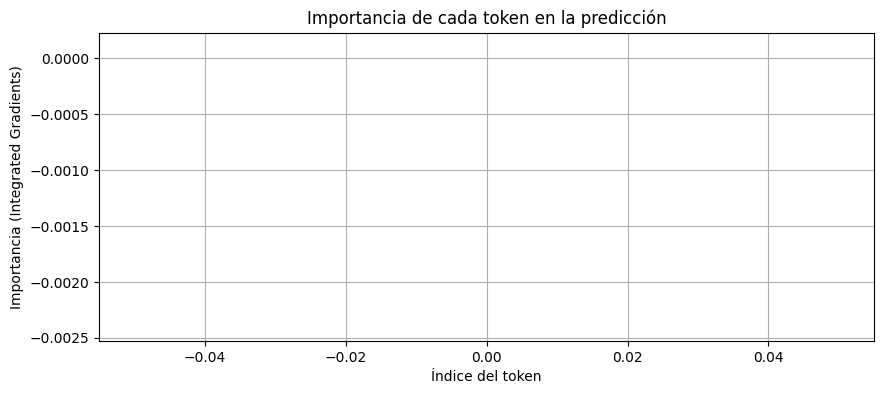

In [10]:
plt.figure(figsize=(10, 4))
plt.title("Importancia de cada token en la predicción")
plt.plot(token_importances)
plt.xlabel("Índice del token")
plt.ylabel("Importancia (Integrated Gradients)")
plt.grid(True)
plt.show()

In [13]:
print(attributions.shape)
print(type(attributions))

(1, 100, 64)
<class 'numpy.ndarray'>


In [14]:
print(token_importances.shape)
print(type(token_importances))

(1, 100)
<class 'numpy.ndarray'>


In [15]:
print(token_importances)

[[-1.21755772e-10 -3.04203718e-10 -2.42112080e-10 -3.82665566e-10
  -3.76636500e-10 -7.90081001e-10 -4.53952737e-10 -1.06201337e-09
  -2.08417936e-10 -5.51584223e-10 -2.87515622e-10 -8.37172442e-10
  -1.04276265e-09 -2.27258523e-09 -7.41553929e-10 -3.33833350e-10
  -8.49075921e-10 -2.39635067e-09  2.88215340e-10 -1.93110017e-09
   1.48490154e-09  4.70228079e-10 -8.56470450e-09 -3.31597483e-09
  -1.47106087e-08 -1.23806201e-08 -1.08380931e-08 -1.35016540e-08
  -2.97980076e-08 -4.07013268e-09 -3.35544126e-09  3.38675754e-09
  -4.84193237e-08 -1.94716989e-08 -2.37970088e-08 -1.31878464e-09
  -5.05506428e-08 -8.34056806e-08 -4.92269692e-09 -6.10752764e-08
  -7.63590577e-08  1.47777754e-08  1.47743009e-08 -2.31793052e-07
   1.05308949e-07  7.79207170e-08  9.18125096e-08  3.34929894e-07
  -1.98042457e-07  5.24100727e-08 -5.08323339e-08  3.87335973e-07
   3.09840800e-07 -1.48465276e-07  7.00959845e-07  7.73551562e-07
   9.28866029e-07 -5.59648356e-07 -2.35815878e-06 -3.63798478e-07
  -1.25310